<a href="https://colab.research.google.com/github/royam0820/prompt-engineering/blob/main/l6_transforming_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transforming

In this notebook, we will explore how to use Large Language Models for text transformation tasks such as language translation, spelling and grammar checking, tone adjustment, and format conversion.



In the context of prompt engineering, transforming refers to the process of **guiding an AI model to convert or alter data from one format, style, or structure to another**. This could involve a wide range of tasks, such as converting text to a different language, changing the format of data, rephrasing sentences, summarizing information, or even converting text into structured data formats like JSON or XML.

### Key Aspects of Transforming in Prompt Engineering
- **Clear Instructions**: The prompt should clearly specify what transformation is required. This includes defining the input format and the desired output format.
- **Example-Based Guidance**: Providing examples of the input and output can help the model understand the transformation process better.
- **Context Awareness**: The transformation should take into account the context of the input to produce accurate and relevant outputs.

## Setup

In [2]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.8 MB/s eta 0:00:00


In [3]:
import openai
import os
from google.colab import userdata

In [4]:
from pprint import pprint

In [22]:
print(openai.__version__)

1.35.3


In [23]:
openai_api_key = userdata.get("OPENAI_API_KEY")
os.environ["OPENAI_API_KEY"] = openai_api_key

In [24]:
client = openai.OpenAI()

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0
    )
    return response.choices[0].message.content

## Translation

ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.

In [26]:
# simple translation
prompt = f"""
Translate the following English text to Spanish: \
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

Hola, me gustaría ordenar una licuadora.


In [27]:
# exemple 1 - identifying a language
prompt = f"""
Tell me which language this is:
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

This is French.


In [28]:
# exemple 2 - identifying a language
prompt = f"""
Tell me which language this is:
```বাতির দাম কত```
"""
response = get_completion(prompt)
print(response)

This is Bengali language.


In [29]:
# exemple 2 - identifying a language
prompt = f"""
Tell me which language this is:
```Pila ang gasto sa lampara```
"""
response = get_completion(prompt)
print(response)

This is in Filipino/Tagalog language.


In [42]:
# multiple language translations including dialect!
prompt = f"""
Translate the following  text to French and Spanish
and English and English pirate and brummies: \
```I have a son```
"""
response = get_completion(prompt)
print(response)

French: J'ai un fils
Spanish: Tengo un hijo
English: I have a son
English Pirate: I be havin' a son
Brummies: I got a son


NB: the Brummies language is a dialect from Birminghan, used in the famous Netflix series: Peaky Blinders.

In [43]:
# translation with tones
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms:
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


NB: in the example above, we are using single quote instead of backticks, it does not really matter, what is essential is to denote a clear separation between the prompt and the context to solve.

### Universal Translator
Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

In [44]:
# several IT messages given by users in different languages.
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
]

In [ ]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Korean: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

Original message (This is French.): La performance du système est plus lente que d'habitude.
English: "The system performance is slower than usual."
Korean: "시스템 성능이 평소보다 느립니다." 

Original message (This is Spanish.): Mi monitor tiene píxeles que no se iluminan.
English: "My monitor has pixels that do not light up."

Korean: "내 모니터에는 불이 켜지지 않는 픽셀이 있습니다." 

Original message (Italian): Il mio mouse non funziona
English: My mouse is not working
Korean: 내 마우스가 작동하지 않습니다 

Original message (This is Polish.): Mój klawisz Ctrl jest zepsuty
English: My Ctrl key is broken
Korean: 제 Ctrl 키가 고장 났어요 

Original message (This is Chinese.): 我的屏幕在闪烁
English: My screen is flickering
Korean: 내 화면이 깜박거립니다 



NB: the code output gives you
- the original message, indicating the language as well, then
- the message will be translated into English and Korean.

## Try it yourself!
Try some translations on your own!

## Tone Transformation
Writing can vary based on the intended audience. ChatGPT can produce different tones.


In [ ]:
prompt = f"""
Translate the following from slang to a business letter:
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

Dear Sir/Madam,

I am writing to bring to your attention the specifications of a standing lamp that I believe may be of interest to you. 

Sincerely,
Joe


## Format Conversion
ChatGPT can translate between formats. The prompt should describe the input and output formats.

In [ ]:
data_json = { "restaurant employees" :[
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

<html>
<head>
    <title>Restaurant Employees</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Name</th>
            <th>Email</th>
        </tr>
        <tr>
            <td>Shyam</td>
            <td>shyamjaiswal@gmail.com</td>
        </tr>
        <tr>
            <td>Bob</td>
            <td>bob32@gmail.com</td>
        </tr>
        <tr>
            <td>Jai</td>
            <td>jai87@gmail.com</td>
        </tr>
    </table>
</body>
</html>


In [ ]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


## Spellcheck/Grammar check.

Here are some examples of common grammar and spelling problems and the LLM's response.

To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [ ]:
# spellcheck and grammar check
text = [
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

The girl with the black and white puppies has a ball.
No errors found
No errors found.
There goes my freedom. They're going to bring their suitcases.
You're going to need your notebook.
No errors found.
No errors found


In [46]:
# proofread and text revision
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
pprint(response)

('I got this for my daughter for her birthday because she keeps taking mine '
 'from my room. Yes, adults also like pandas too. She takes it everywhere with '
 "her, and it's super soft and cute. One of the ears is a bit lower than the "
 "other, and I don't think that was designed to be asymmetrical. It's a bit "
 'small for what I paid for it though. I think there might be other options '
 'that are bigger for the same price. It arrived a day earlier than expected, '
 'so I got to play with it myself before I gave it to my daughter.')


We can now find the diff between the original v.s. the revised text using Python redlines.

In [51]:
!pip install redlines

In [52]:
# testing the redlines
from redlines import Redlines
from IPython.display import display, Markdown

# Example texts for comparison
text = "This is the original text."
response = "This is the modified text."

# Create a Redlines object
diff = Redlines(text, response)

# Display the markdown output
display(Markdown(diff.output_markdown))


This is the <span style='color:red;font-weight:700;text-decoration:line-through;'>original </span><span style='color:green;font-weight:700;'>modified </span>text.

NB: redlines not working in Google Colab ;-(

In [54]:
from redlines import Redlines
diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

This is the <span style='color:red;font-weight:700;text-decoration:line-through;'>original </span><span style='color:green;font-weight:700;'>modified </span>text.

The output from the code above should be as follows

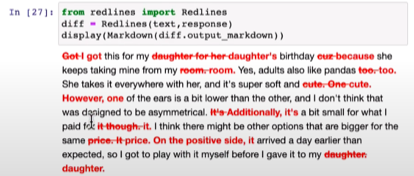

In [56]:
# Make the review more compelling using the APA style, and audience being advanced reader
prompt = f"""
proofread and correct this review. Make it more compelling.
Ensure it follows APA style guide and targets an advanced reader.
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

**Review:**

The exquisite craftsmanship and attention to detail in this product truly sets it apart from its competitors. The intricate design and superior quality materials used make it a standout choice for those who appreciate luxury and sophistication. 

Furthermore, the functionality of this product is unparalleled. Its innovative features and user-friendly interface make it a must-have for anyone seeking a seamless and efficient user experience. 

In conclusion, this product is a testament to superior design and innovation. Its combination of style, quality, and functionality make it a top choice for the discerning consumer. Don't miss out on the opportunity to elevate your lifestyle with this exceptional product.

NB: The [APA (American Psychological Association) style guide](https://apastyle.apa.org/style-grammar-guidelines) is a widely used format for writing and citing sources in academic papers, particularly within the social sciences, education, and psychology. The APA style provides a comprehensive set of guidelines for formatting documents, including the structure of the paper, in-text citations, and reference lists. The most recent edition is the 7th edition, released in October 2019.

## Try it yourself!
Try changing the instructions to form your own review.

### Exemple 1 - Transforming an html into JSON

In [16]:
html_content = """
<ul>
    <li>Apples</li>
    <li>Bananas</li>
    <li>Cherries</li>
</ul>
"""

In [18]:
prompt = f"""
Transform the following HTML list into a JSON array. The HTML is delimited by triple backticks.

HTML:
```{html_content}```

Expected JSON output:
"""

# Get the response from the language model
response = get_completion(prompt)
print("Response:", response)

Response: ["Apples", "Bananas", "Cherries"]


### Exemple 2 - Transforming a markdown format into JSON

In [14]:
from IPython.display import Markdown, display

# List of items
items = ["Apples", "Bananas", "Cherries"]

# Construct the markdown list
markdown_list = "\n".join(f"{i+1}. {item}" for i, item in enumerate(items))

# Display the markdown list
display(Markdown(markdown_list))


1. Apples
2. Bananas
3. Cherries

In [19]:
prompt = f"""
Transform the following markdown list into a JSON array. The markdown is delimited by triple backticks.

HTML:
```{markdown_list}```

Expected JSON output:
"""

# Get the response from the language model
response = get_completion(prompt)
print("Response:", response)

Response: ["Apples", "Bananas", "Cherries"]


NB: The `json.dumps` function converts the list of items into a JSON array.

Thanks to the following sites:

https://writingprompts.com/bad-grammar-examples/
